<a href="https://colab.research.google.com/github/juandiego2205/Biosenales/blob/main/P5/Practica5_Biosenales_6am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.2 Representaci√≥n de se√±ales**



In [101]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio;
from scipy.signal import welch
from google.colab import drive
import scipy.io
import pandas as pd
import os



26


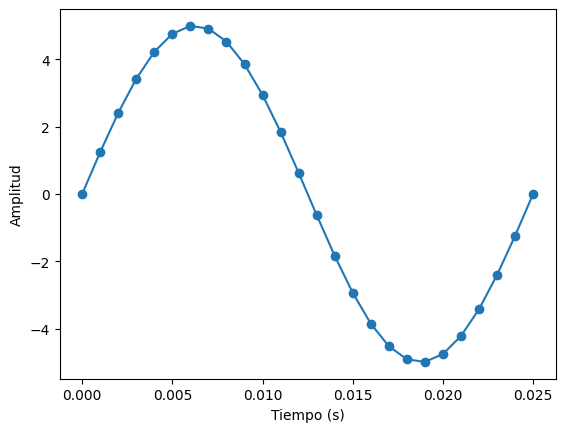

In [96]:
Fo = 40 # Frecuencia fundamental de la se√±al

Tp = 1/Fo # Periodo de la se√±al
Fs = 1000 # Frecuencia de muestreo

T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T)
print(len(t))
# Tiempo para un ciclo de la se√±al con duraci√≥n de Tp m√°s una muestra T
# PREGUNTAR -- se hace para que no se pierda ninguna muestra
#ya que abarca mas de la se√±al (graficar t, tp y t+tp)

A = 5 # Amplitud
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

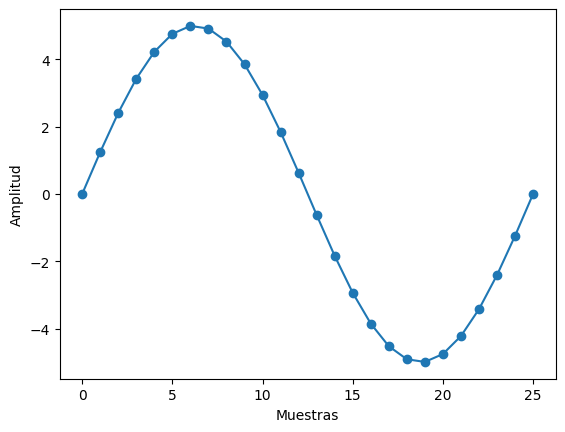

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False False  True  True  True  True  True  True False  True
  True False]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.99840144e-15
  0.00000000e+00  0.00000000e+00 -1.99840144e-15 -1.77635684e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.55271368e-15  0.00000000e+00
  0.00000000e+00  4.44089210e-15]


In [97]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)

plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()
#Se imprime para ver la diferencia entre todos los valores entre x1 y x
print(x1 == x)
print(x1-x)
# punto a se comprueban que las se√±ales evaluandolas punto a punto son iguales eso queire decir que solo es una manera
# diferente de verlo como una ayduda visual para ver no tiempo si no numero de
# muestras tomadas

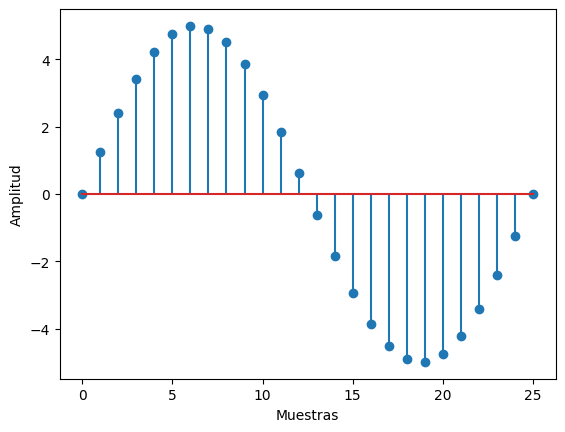

In [98]:
plt.stem(n, x1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

#**3.3 Energ√≠a y potencia en el dominio del tiempo**

In [5]:
energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)
print("POTENCIA_SE√ëAL: ",potencia)
print("RMS_SE√ëAL: ",rms)

POTENCIA_SE√ëAL:  12.500000000000002
RMS_SE√ëAL:  3.5355339059327378


In [6]:
#ploteamos la se√±al por 10
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)

# Sacamos la energia , potencia y RMS de la se√±al con 10 ciclos
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)

print("POTENCIA_SE√ëAL 1O CICLOS: ",potencia10)

# b) La potencia es la misma que en ùë•(ùëõ). ¬øPor qu√©?

# Para esto sacamos la potencia de un solo ciclo
energia_1ciclo = sum(x1**2)
potencia_1ciclo = energia_1ciclo/(len(t)-1)
rms_1ciclo = np.sqrt(potencia_1ciclo)

print("POTENCIA_SE√ëAL 1O CICLOS: ",potencia_1ciclo)

print("DIFERENCIA DE ENTRE POTENCIA_SE√ëAL 1O CICLOS Y UN CICLO: ",potencia10-potencia_1ciclo)
# existe un error el cual es despreciable asi que se pueden tomar como iguales
# ya que el error de arriba aca se amplifica

POTENCIA_SE√ëAL 1O CICLOS:  12.500000000000005
POTENCIA_SE√ëAL 1O CICLOS:  12.500000000000002
DIFERENCIA DE ENTRE POTENCIA_SE√ëAL 1O CICLOS Y UN CICLO:  3.552713678800501e-15


#**3.4 An√°lisis de Fourier en tiempo discreto**

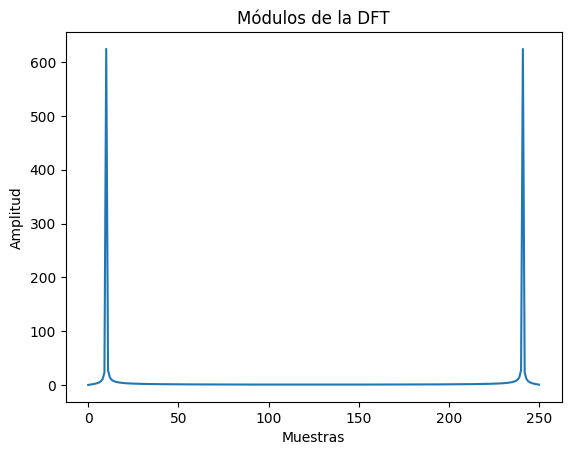

In [7]:
X10 = np.fft.fft(x10)
plt.plot(abs(X10))
plt.title('M√≥dulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

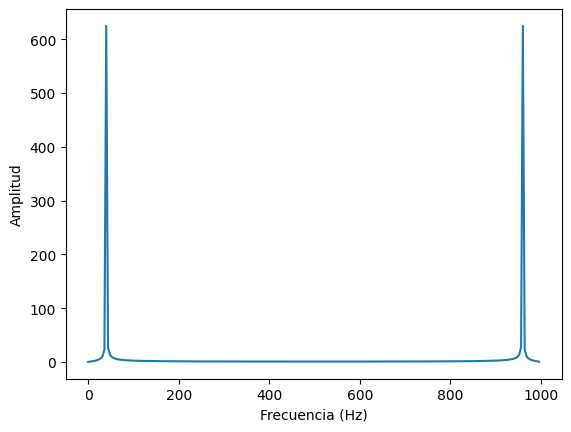

In [ ]:
#PARA PODER RELACIONARLA EN TIEMPO CONTINUO
N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

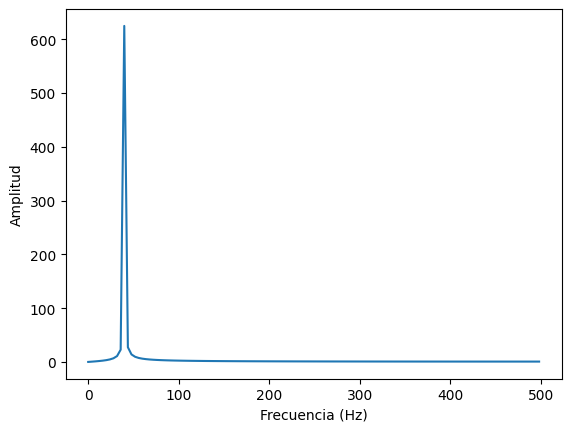

In [ ]:
# Frecuencia Nyquist.
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

##**3.5 Periodogramas**


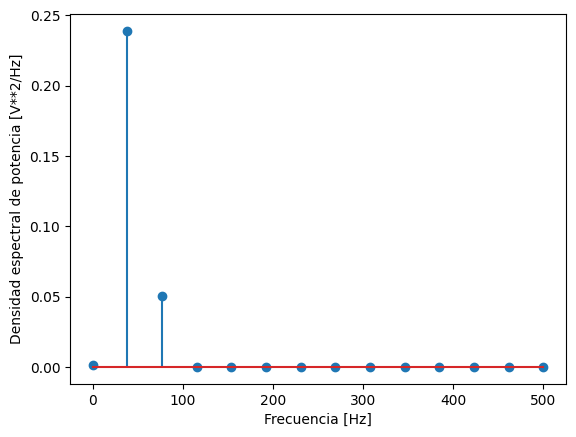

In [ ]:
nperseg = 1000
noverlap = 25 # NO SE POR QUE DA ESE VALOR DE NOVER PARA QUE FUNCIONE

f, Pxx = pwelch(x, Fs, window='hamming', nperseg=nperseg, noverlap=noverlap)
plt.stem(f, Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [V**2/Hz]')

plt.show()

# COMIENZO DEL PROYECTO

4.1 Cree una se√±al que sea la suma de tres componentes sinusoidales con frecuencias de 40,
80 y 160 Hz. Defina la frecuencia de muestreo m√≠nima necesaria para representar la se√±al,
y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)

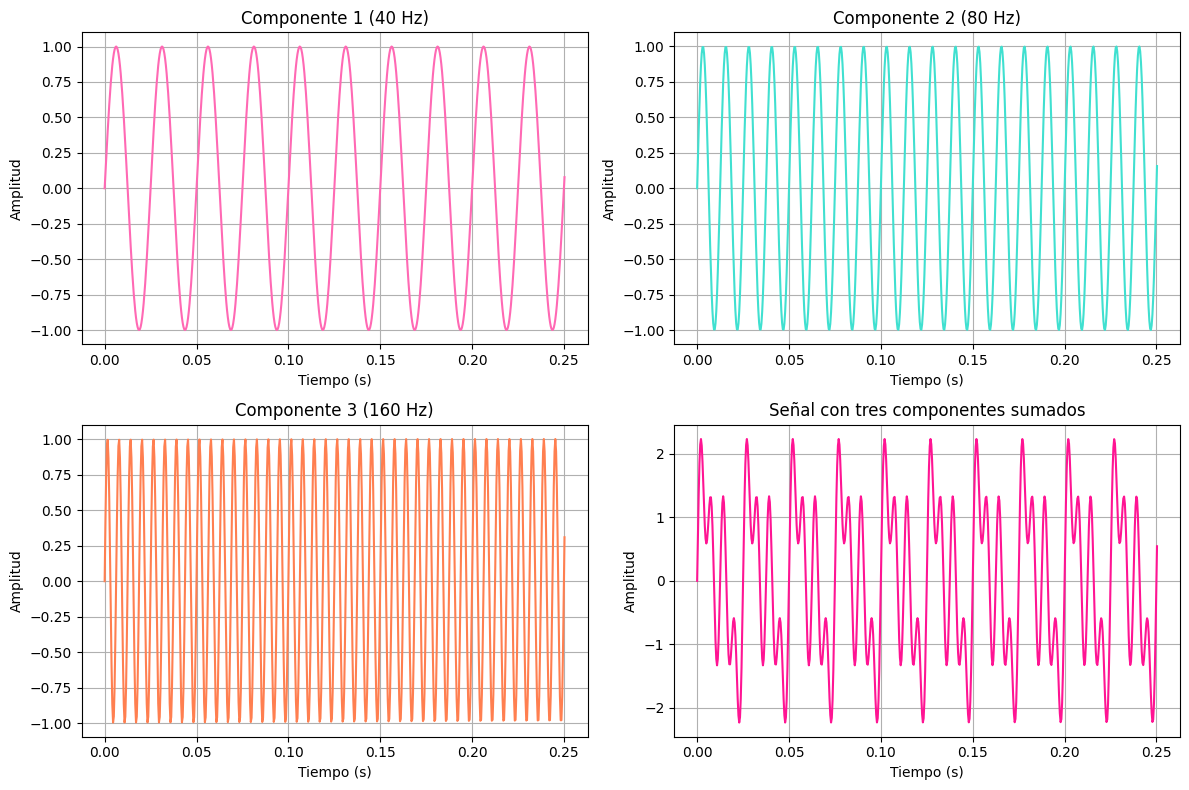

In [27]:
# Frecuencias de los componentes sinusoidales y colores
frec = [40, 80, 160]
colores = ['#FF69B4', '#40E0D0', '#FF7F50']
fs = (frec[2] * 15)+1 # Frecuencia de muestreo (Hz)
fo = frec[2]       # Frecuencia fundamental (Hz)
T = 1 / fo      # Per√≠odo fundamental (segundos)
T_muestreo = 1 / fs  # Per√≠odo de muestreo (segundos)

# Vector de tiempo para observar 10 ciclos
t = np.arange(0, 40 * T + T_muestreo, T_muestreo)
# Generaci√≥n de componentes individuales
componentes = [np.sin( 2*np.pi * f * t) for f in frec]

# Se√±al resultante (suma de componentes)
se√±al_total = sum(componentes)

# Lista extendida con componentes y la se√±al completa
componentes.append(se√±al_total)  # A√±adir se√±al completa como √∫ltimo elemento
colores.append('deeppink')       # Color para la se√±al completa
titulos = [f'Componente {i+1} ({frec[i]} Hz)' for i in range(len(frec))] + ['Se√±al con tres componentes sumados']

# Creaci√≥n de la figura y los subplots
plt.figure(figsize=(12, 8))

# Graficaci√≥n en subplots usando un bucle
for i, (comp, color, titulo) in enumerate(zip(componentes, colores, titulos), start=1):
    plt.subplot(2, 2, i)
    plt.plot(t, comp, color=color)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title(titulo)
    plt.grid(True)

# Ajuste y muestra de la figura
plt.tight_layout()
plt.show()

4.2 Calcule la transformada de Fourier de la se√±al y grafique el espectro de frecuencia.
Identifique en el espectro las frecuencias que componen la se√±al (trabaje con 10 periodos
de la se√±al). (10%)

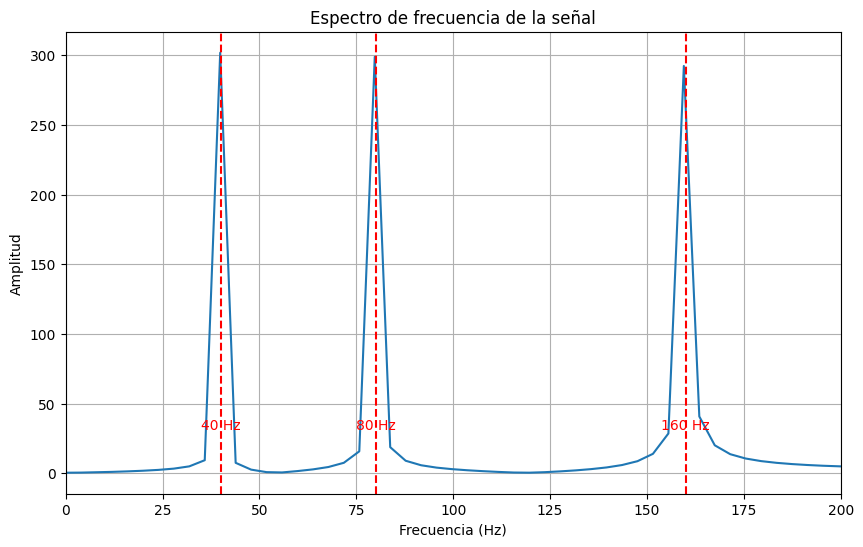

In [42]:
X = np.fft.fft(se√±al_total)
N = len(se√±al_total)
f = np.fft.fftfreq(N, T_muestreo)
plt.figure(figsize=(10, 6))
plt.plot(f[:N // 2], np.abs(X[:N // 2]))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Espectro de frecuencia de la se√±al")
plt.grid(True)
plt.xlim(0, 200)
frecuencias_a_marcar = [40, 80, 160,]
for freq in frecuencias_a_marcar:
    plt.axvline(x=freq, color='r', linestyle='--')
    plt.text(freq, plt.ylim()[1] * 0.1, f'{freq} Hz', color='red', ha='center')
plt.show()



4.3 Consulte la funci√≥n que permite realizar el c√°lculo de la transformada inversa de Fourier.
Apl√≠quelo a la se√±al anterior. (10%)

La transformada inversa de Fourier es una operaci√≥n matem√°tica fundamental que permite convertir una funci√≥n del dominio de la frecuencia de vuelta al dominio del tiempo. Es la funci√≥n opuesta a la transformada de Fourier, que descompone una se√±al temporal en sus componentes de frecuencia. La transformada inversa se aplica en una amplia variedad de campos, incluyendo la ingenier√≠a, la f√≠sica, y la teor√≠a de se√±ales, donde se requiere el an√°lisis y la reconstrucci√≥n de se√±ales a partir de sus representaciones en frecuencia.
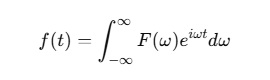

La transformada inversa es especialmente √∫til en el procesamiento de se√±ales, ya que permite la manipulaci√≥n de las componentes de frecuencia de una se√±al (como el filtrado) y luego volver a convertirla al dominio del tiempo para su an√°lisis o visualizaci√≥n. Por ejemplo, en aplicaciones de filtrado digital, se pueden eliminar componentes no deseadas (como ruido) en el dominio de la frecuencia, y luego utilizar la transformada inversa de Fourier para obtener la se√±al limpia en el dominio del tiempo.

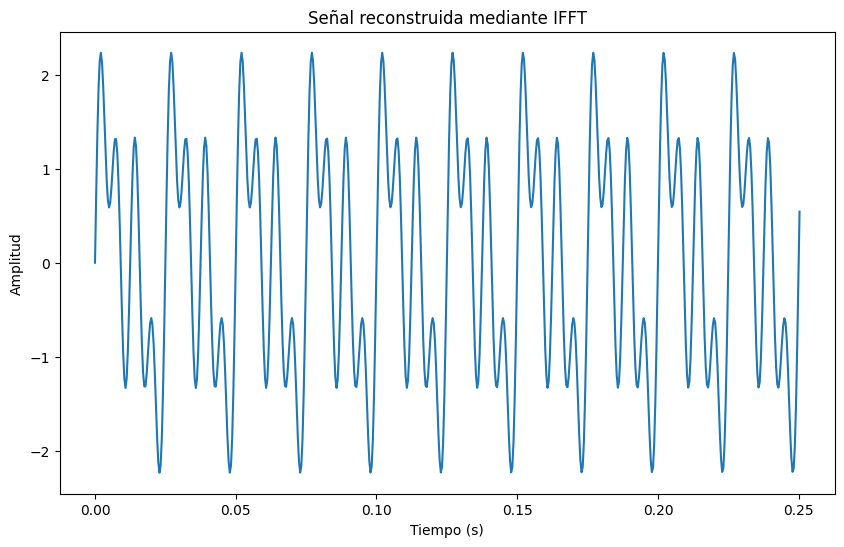

In [43]:
# Calcular la Inversa de Fourier
x_inv = np.fft.ifft(X)

# Graficar la se√±al reconstruida
plt.figure(figsize=(10, 6))
plt.plot(t, np.real(x_inv))
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Se√±al reconstruida mediante IFFT")
plt.show()


4.4 ¬øPodr√≠a decir que las siguientes l√≠neas aplican un filtro? ¬øPor qu√©? (10%

Las siguientes l√≠neas de c√≥digo implementan un filtro digital utilizando la transformada de Fourier. Este proceso se basa en la capacidad de la transformada de Fourier para descomponer una se√±al temporal en sus componentes de frecuencia. Al pasar al dominio de la frecuencia, se puede realizar una indexaci√≥n de las frecuencias presentes en la se√±al original. Esto permite identificar y seleccionar las frecuencias que se desean mantener, mientras se eliminan aquellas que son indeseadas, como el ruido o componentes espec√≠ficas de la se√±al.

El proceso comienza con la aplicaci√≥n de la transformada de Fourier a la se√±al original, lo que transforma la se√±al del dominio del tiempo al dominio de la frecuencia. En este punto, se pueden manipular las componentes de frecuencia de la se√±al. Por ejemplo, se pueden recortar frecuencias espec√≠ficas o establecer un rango de frecuencias de inter√©s, creando as√≠ un filtro pasabanda o un filtro notch. Esta manipulaci√≥n en el dominio de la frecuencia es lo que convierte el proceso en un filtrado efectivo.

Una vez que se ha realizado la indexaci√≥n y se han eliminado las frecuencias no deseadas, se aplica la transformada inversa de Fourier. Esta operaci√≥n convierte la se√±al filtrada de nuevo al dominio del tiempo, permitiendo obtener la se√±al final que ha sido modificada seg√∫n las especificaciones del filtrado. La transformada inversa asegura que, a partir de las componentes de frecuencia seleccionadas, se pueda reconstruir la se√±al en su forma temporal.

<ipython-input-44-4a2269673d73>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13]


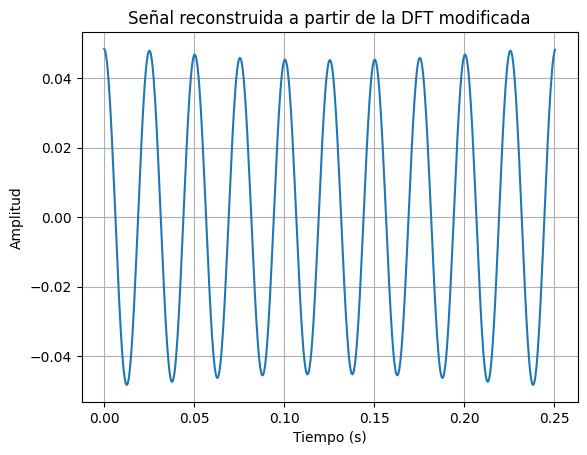

In [44]:
F1 = np.fft.fft(se√±al_total)
F2 = np.zeros(len(F1))
F2[9:13] = F1[9:13]
xr = np.fft.ifft(F2)
fig = plt.figure()
plt.plot(t[0:len(np.real(xr))], np.real(xr))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Se√±al reconstruida a partir de la DFT modificada')
plt.grid(True)
plt.show()



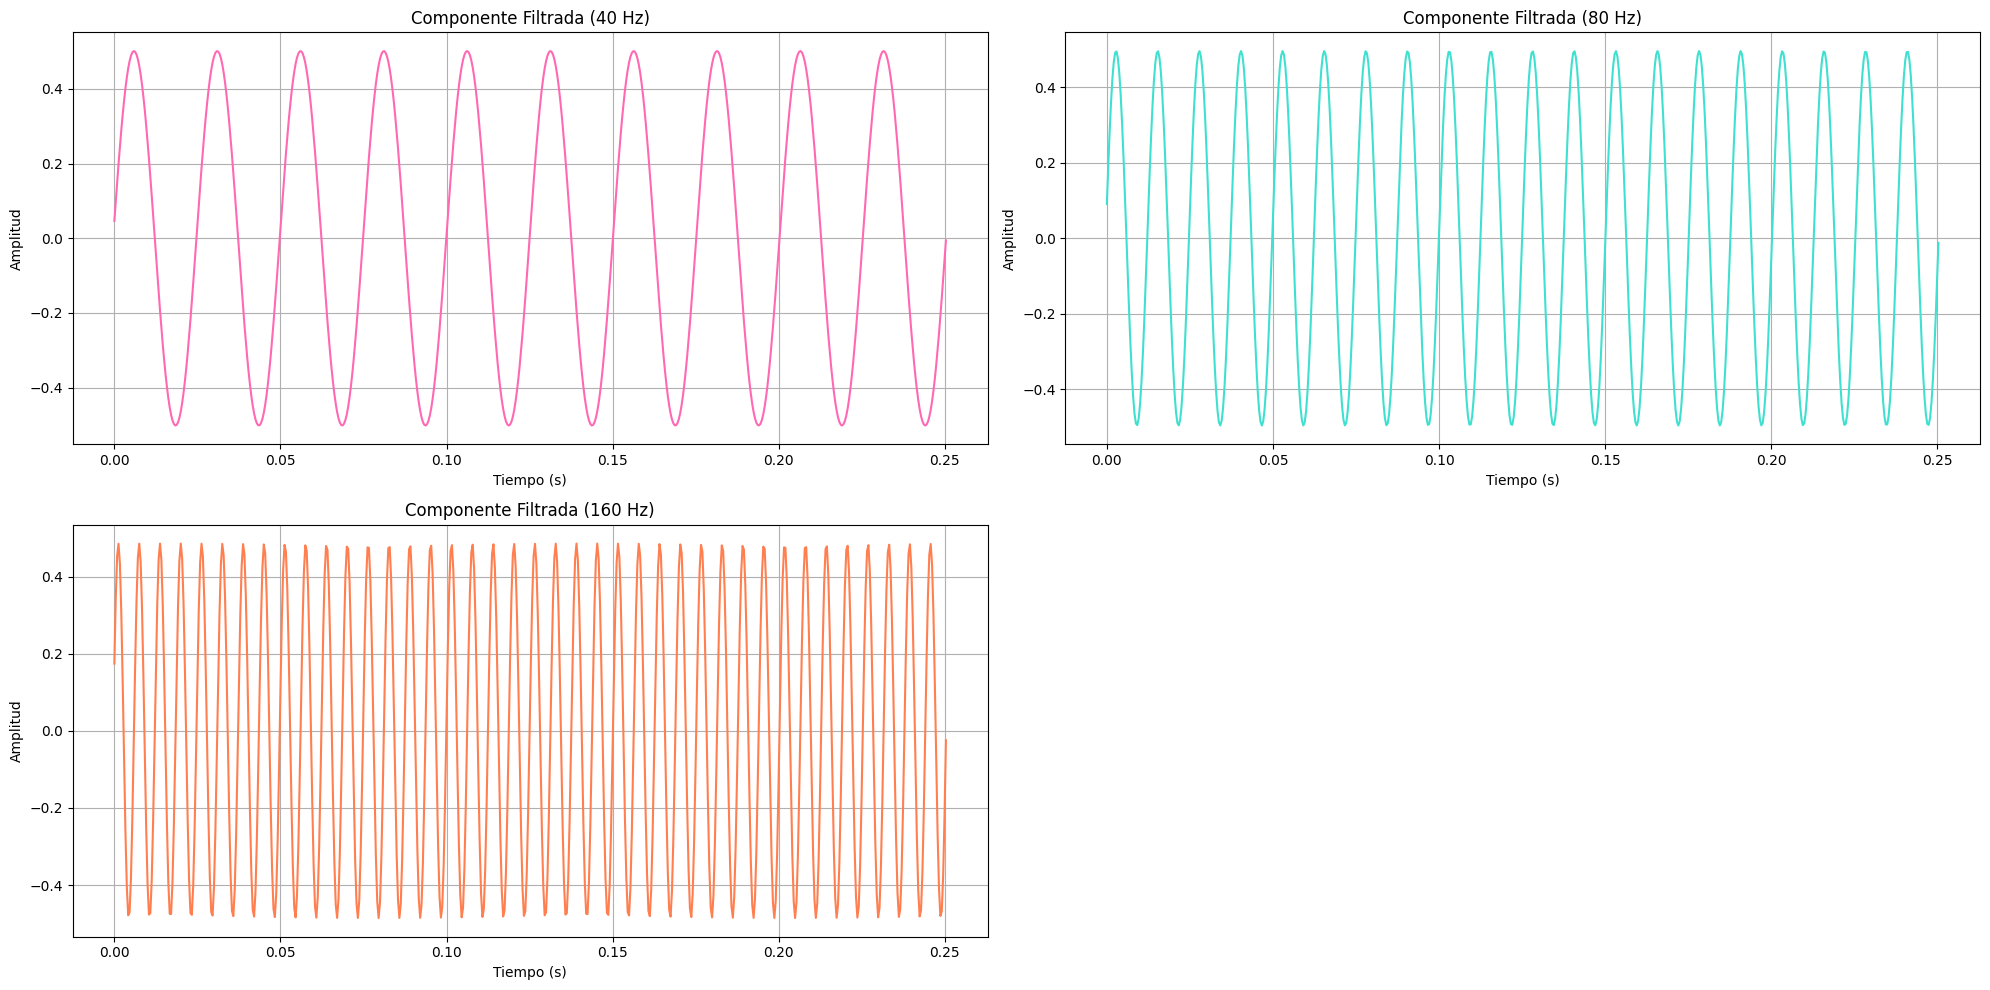

In [50]:
frecuencias_fft = np.fft.fftfreq(len(F1), d=T_muestreo)
plt.figure(figsize=(20, 10))
for i, f in enumerate(frec):
        F_comp = np.zeros(len(F1), dtype=complex)
        index = np.argmin(np.abs(frecuencias_fft - f))
        F_comp[index] = F1[index]
        xr_comp = np.fft.ifft(F_comp)
        plt.subplot(2, 2, i + 1)
        plt.plot(t[0:len(np.real(xr_comp))], np.real(xr_comp), color=colores[i])
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Amplitud')
        plt.title(f'Componente Filtrada ({f} Hz)')
        plt.grid(True)
plt.tight_layout()
plt.show()

4.5 El archivo adjunto (senecg.mat) contiene una se√±al de ECG adquirida a una frecuencia de
muestreo de 250 Hz. Realice un an√°lisis en frecuencia de la se√±al usando periodogramas
de Welch y determine si es necesario eliminar ruido, en tal caso, elim√≠nelo de la forma que
se mostr√≥ antes y compruebe que lo haya realizado, calcule la transformada inversa de
Fourier de la se√±al filtrada y compruebe con el periodograma. (Usar una ventana Hanning,
y justificar la elecci√≥n del solapamiento y el ancho de la ventaja)

Para este paso, se extrajo una se√±al en formato MAT, la cual se carg√≥ y se someti√≥ a un periodograma de Welch. Se utiliz√≥ una ventana de tipo Hanning con un tama√±o de 256 muestras y un solapamiento del 50%. Estos par√°metros fueron seleccionados cuidadosamente para optimizar el an√°lisis en el dominio de la frecuencia y minimizar la p√©rdida de informaci√≥n.

El periodograma de Welch es un m√©todo eficaz para estimar la densidad espectral de potencia de una se√±al, ya que promedia m√∫ltiples periodogramas calculados a partir de segmentos de la se√±al. La elecci√≥n de una ventana de tipo Hanning es crucial, ya que esta ventana reduce los efectos de discontinuidad en los extremos de cada segmento, lo que a su vez ayuda a suavizar el espectro y a minimizar la variabilidad en la estimaci√≥n de la densidad espectral. Las ventanas de Hanning son particularmente efectivas para se√±ales que pueden presentar picos y ruidos en el dominio de la frecuencia.

El tama√±o de la ventana de 256 muestras proporciona un equilibrio adecuado entre la resoluci√≥n en frecuencia y el n√∫mero de segmentos utilizados en el promedio. Un tama√±o de ventana m√°s peque√±o podr√≠a resultar en una menor resoluci√≥n espectral, mientras que un tama√±o demasiado grande podr√≠a provocar una p√©rdida de informaci√≥n temporal.

El solapamiento del 50% es un aspecto clave en este an√°lisis. Este solapamiento permite que cada nuevo segmento de la se√±al comparta la mitad de sus muestras con el segmento anterior. Al hacerlo, se maximiza la cantidad de datos utilizados para el c√°lculo del periodograma y se minimizan los efectos de variabilidad que podr√≠an surgir de usar segmentos independientes. Esto es particularmente importante en el an√°lisis de se√±ales como el ECG, donde la preservaci√≥n de caracter√≠sticas temporales es esencial para una representaci√≥n precisa en el dominio de la frecuencia.

El objetivo de este diagrama es observar c√≥mo se distribuye el contenido en el dominio de la frecuencia en una se√±al de ECG. Al aplicar el periodograma de Welch con los par√°metros seleccionados, se espera obtener una representaci√≥n clara de las componentes de frecuencia presentes en la se√±al, lo que puede ser fundamental para el diagn√≥stico y an√°lisis cl√≠nico.



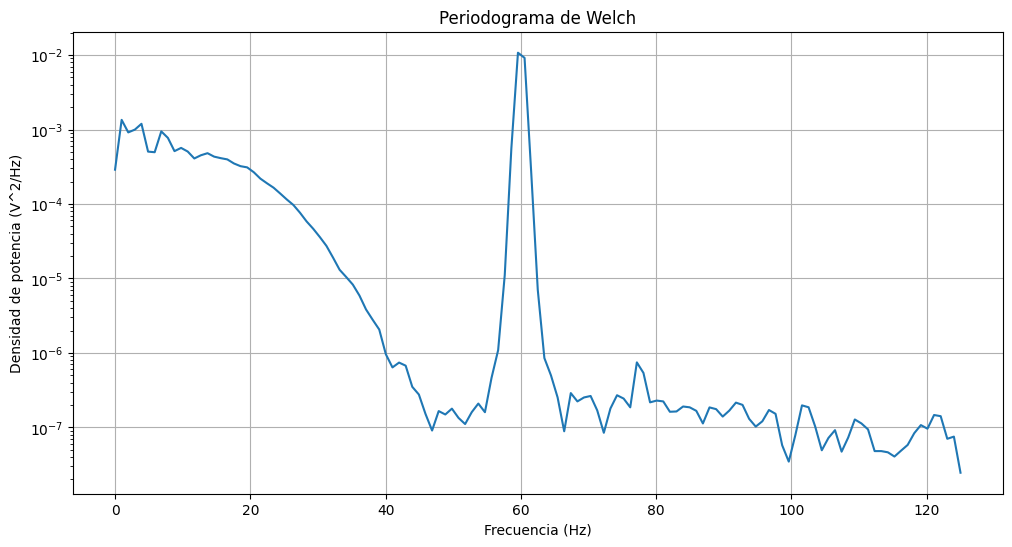

In [112]:
#4.5
file_path = "/content/drive/MyDrive/Biosenales_Proyectos/Practica5/senecg.mat"
data = scipy.io.loadmat(file_path)
ecg_signal = data['ECG'].flatten()

# Par√°metros
fs = 250  # Frecuencia de muestreo (Hz)

# An√°lisis en frecuencia usando el periodograma de Welch

frecuencias, Pxx = welch(ecg_signal, fs, window='hann', nperseg=256, noverlap=128)
# Graficar el periodograma de Welch
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias, Pxx)
plt.title('Periodograma de Welch')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de potencia (V^2/Hz)')
plt.grid()

Como se puede observar en el gr√°fico, las frecuencias que tienen un mayor rango de potencia son las bajas, espec√≠ficamente en el rango de 0 a 40 Hz[1]. Este hallazgo es consistente con la fisiolog√≠a card√≠aca, que indica que las se√±ales cardiacas presentan un rango m√≠nimo de 0.5 Hz. Por lo tanto, se estableci√≥ este valor como el l√≠mite inferior del filtro pasa banda utilizado en el an√°lisis[2].

Adem√°s, se detect√≥ un pico notable en 60 Hz, el cual es com√∫nmente asociado con el ruido el√©ctrico de la red. Este tipo de interferencia puede distorsionar significativamente la se√±al y, por ende, afecta la precisi√≥n de los an√°lisis subsiguientes. Para mejorar la calidad de la se√±al y obtener resultados m√°s fiables, se decidi√≥ eliminar este pico durante el proceso de filtrado.

Dado que el pico de 60 Hz se encontraba por encima del rango del filtro pasa banda, se opt√≥ por realizar √∫nicamente un filtro de paso bajo, ya que la eliminaci√≥n de esta frecuencia no era necesaria para el an√°lisis de la se√±al card√≠aca. De esta manera, al seleccionar un rango de frecuencia adecuado y eliminar el ruido indeseado, se busca optimizar el an√°lisis de la se√±al card√≠aca, facilitando la identificaci√≥n de patrones y anomal√≠as que son cruciales para la evaluaci√≥n cl√≠nica[3]. Este enfoque permite centrar la atenci√≥n en las frecuencias relevantes que proporcionan informaci√≥n significativa sobre la salud del paciente.

<Figure size 1500x1000 with 0 Axes>

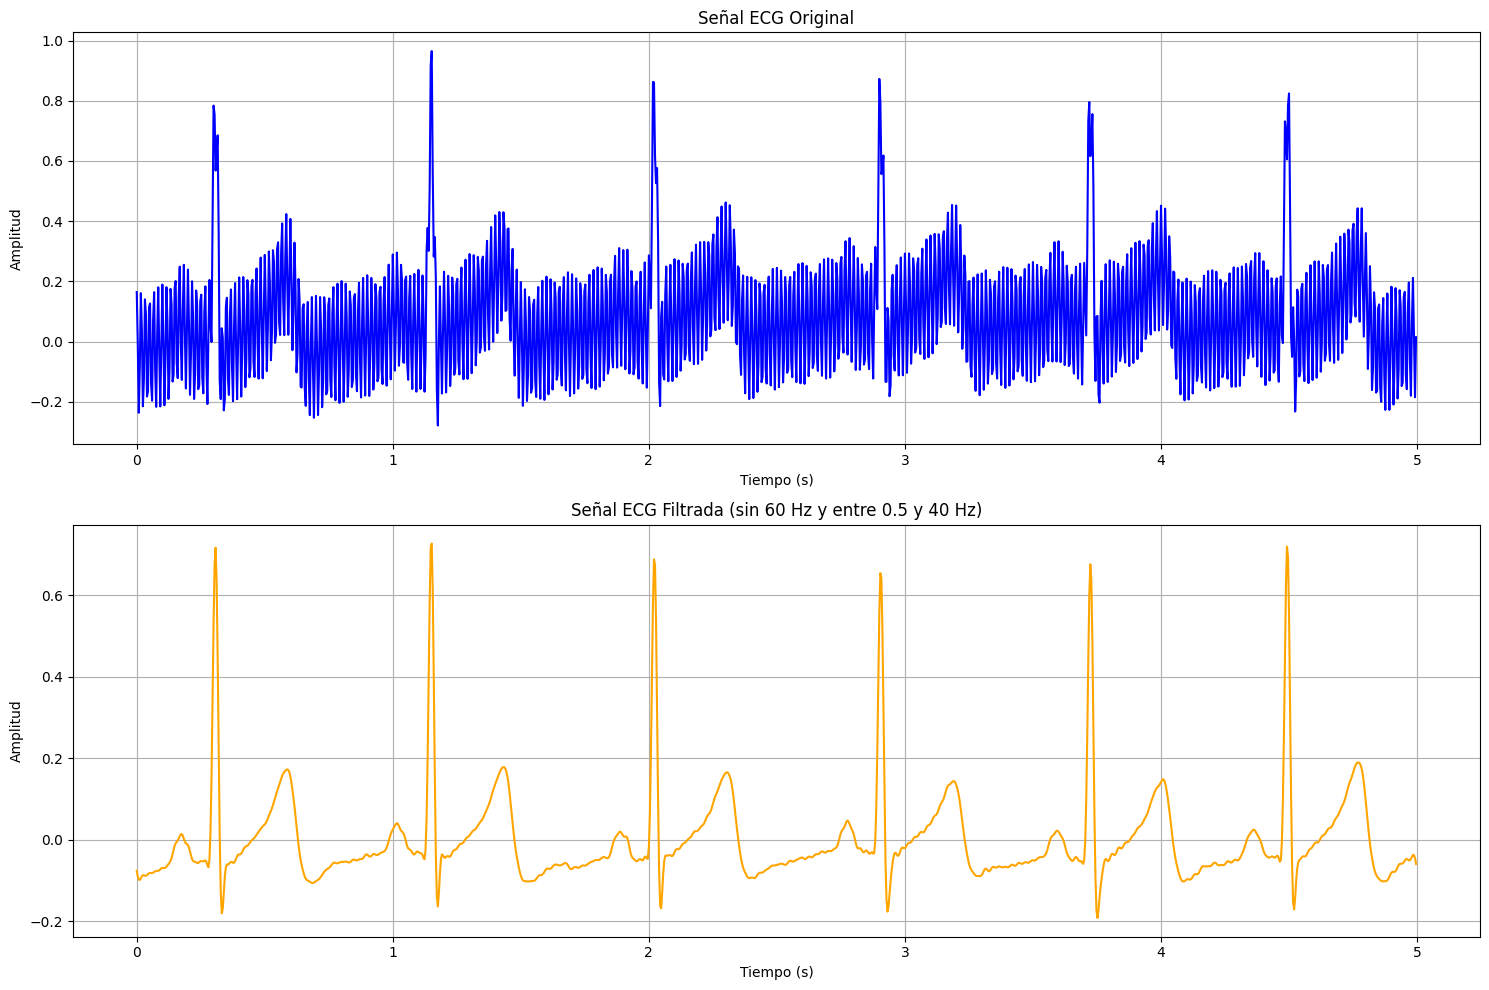

In [91]:
T_muestreo = 1 / fs
t = np.arange(0, len(ecg_signal) / fs, T_muestreo)
F1 = np.fft.fft(ecg_signal)
frecuencias_fft = np.fft.fftfreq(len(F1), d=T_muestreo)
F1_filtrada = np.zeros_like(F1)
for i in range(len(frecuencias_fft)):
    if (0.5 <= abs(frecuencias_fft[i]) <= 40):
        F1_filtrada[i] = F1[i]
ecg_filtrado = np.fft.ifft(F1_filtrada)
plt.figure(figsize=(15, 10))

se√±ales = [ecg_signal, np.real(ecg_filtrado)]
titulos = ['Se√±al ECG Original', 'Se√±al ECG Filtrada (sin 60 Hz y entre 0.5 y 40 Hz)']

plt.figure(figsize=(15, 10))
for i, se√±al in enumerate(se√±ales):
    plt.subplot(2, 1, i + 1)
    plt.plot(t, se√±al, color='blue' if i == 0 else 'orange')
    plt.title(titulos[i])
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()

plt.tight_layout()
plt.show()


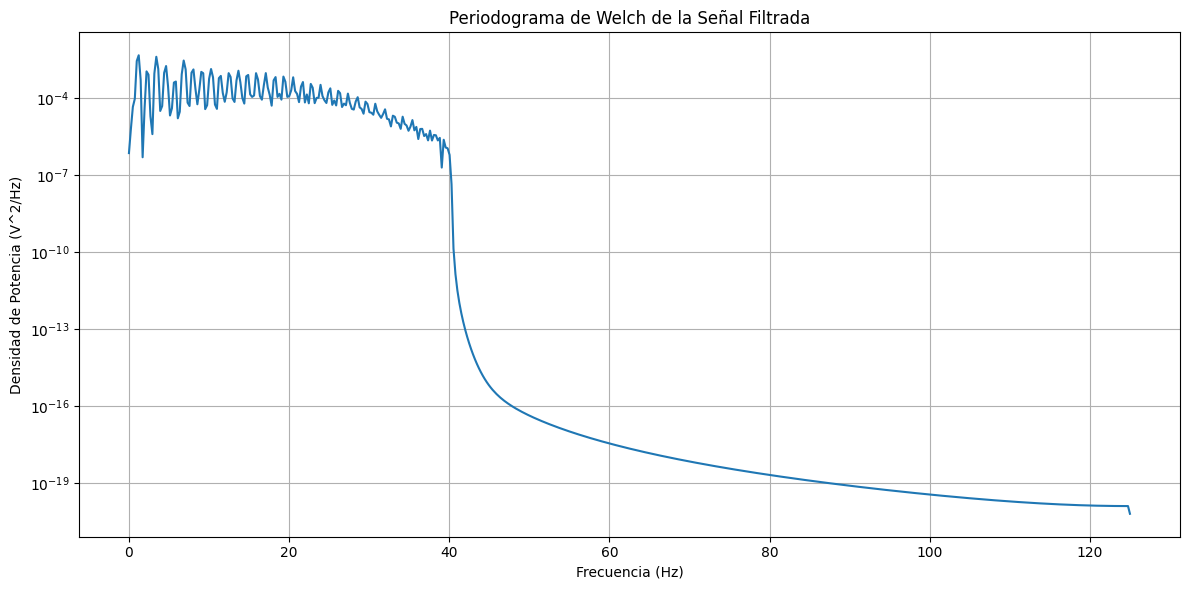

In [92]:
frecuencias_welch, Pxx_welch = welch(ecg_filtrado, fs, window='hann', nperseg=256, noverlap=128)
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias_welch, Pxx_welch)
plt.title('Periodograma de Welch de la Se√±al Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (V^2/Hz)')
plt.grid()
plt.tight_layout()
plt.show()

Aqu√≠ se puede ver claramente que las frecuencias de la se√±al filtrada han reducido su rango, ya que solo se conservan las frecuencias hasta 40 Hz. Este recorte en el espectro de frecuencias implica que las componentes de frecuencia m√°s altas han sido atenuadas o eliminadas, resultando en una p√©rdida de energ√≠a en comparaci√≥n con la se√±al original.

Este fen√≥meno es t√≠pico en el proceso de filtrado, donde se busca minimizar el impacto de las interferencias y ruidos no deseados, lo que, a su vez, puede conllevar una disminuci√≥n de la energ√≠a en ciertas frecuencias. Sin embargo, es fundamental resaltar que la preservaci√≥n de las frecuencias m√°s bajas, que son cr√≠ticas para el an√°lisis de la se√±al card√≠aca, justifica esta reducci√≥n en el rango. Al centrarse en las frecuencias relevantes, se optimiza la calidad de la se√±al para el an√°lisis posterior, permitiendo una mejor interpretaci√≥n y diagn√≥stico cl√≠nico[4].

4.6 Realice un an√°lisis de frecuencia a trav√©s del periodograma de welch de una se√±al de EEG
de un paciente Sano y otra de un paciente con Parkinson de alg√∫n canal que en el proyecto
1 hayan identificado que presentaba diferencias, si no encontr√≥ diferencias, elija un par al
azar. Realice un an√°lisis comparativo de las se√±ales seg√∫n lo que le indiquen los
periodogramas. (Usar una ventana Hanning, y justificar la elecci√≥n del solapamiento y el
ancho de la ventaja) (25%)

In [102]:
ruta= "/content/drive/MyDrive/Biosenales_Practicas/Practica3"
ControlAr= os.listdir(ruta+ '/Control')
control =[]
for i in range(0,len(ControlAr)):
    sujetoi=ruta+'/Control'+'/'+ControlAr[i]
    data=sio.loadmat(sujetoi)
    data=data['data']
    control.append(data)

ParkinsonAr= os.listdir(ruta+ '/parkinson')
parkinson =[]
for i in range(0,len(ParkinsonAr)):
    sujetoi=ruta+'/parkinson'+'/'+ParkinsonAr[i]
    data=sio.loadmat(sujetoi)
    data=data['data']
    parkinson.append(data)


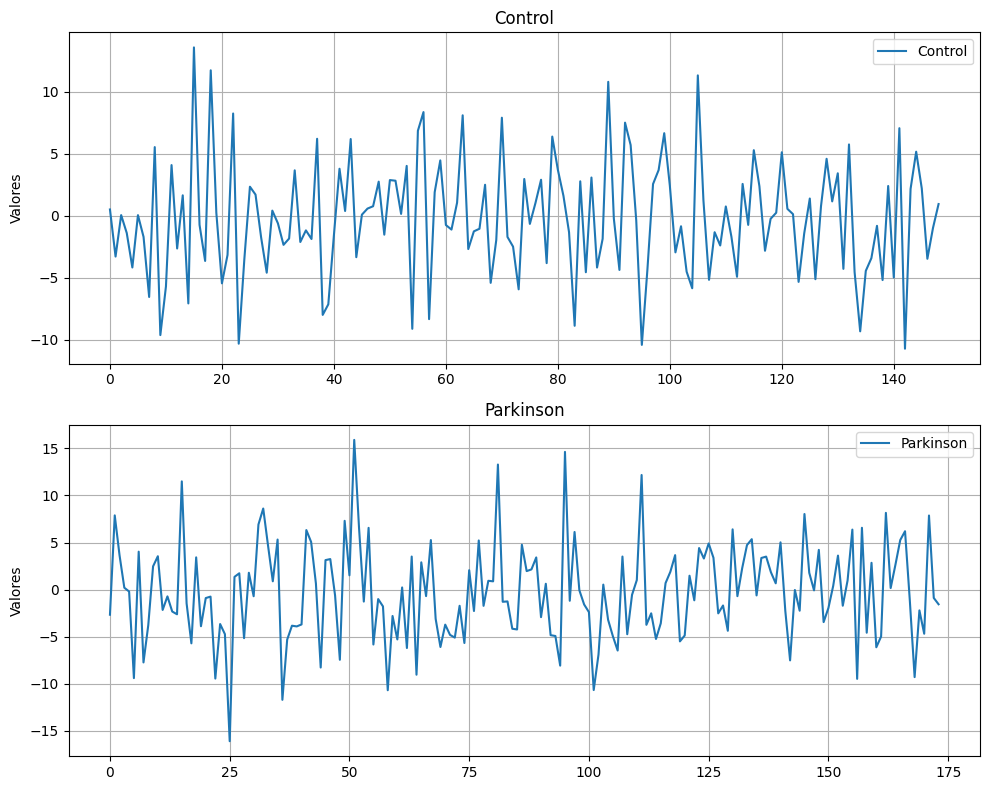

In [114]:
data = [control[1][1, 1], parkinson[1][1, 1]]  # Lista de datos a graficar
labels = ['Control', 'Parkinson']  # Etiquetas correspondientes

plt.figure(figsize=(10, 8))  # Crea una figura con un tama√±o espec√≠fico

for i in range(2):  # Itera sobre los √≠ndices 0 y 1
    plt.subplot(2, 1, i + 1)  # Crea un subplot en la fila i+1
    plt.plot(data[i], label=labels[i])
    plt.title(labels[i])
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 174, using nperseg = 174
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 149, using nperseg = 149
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


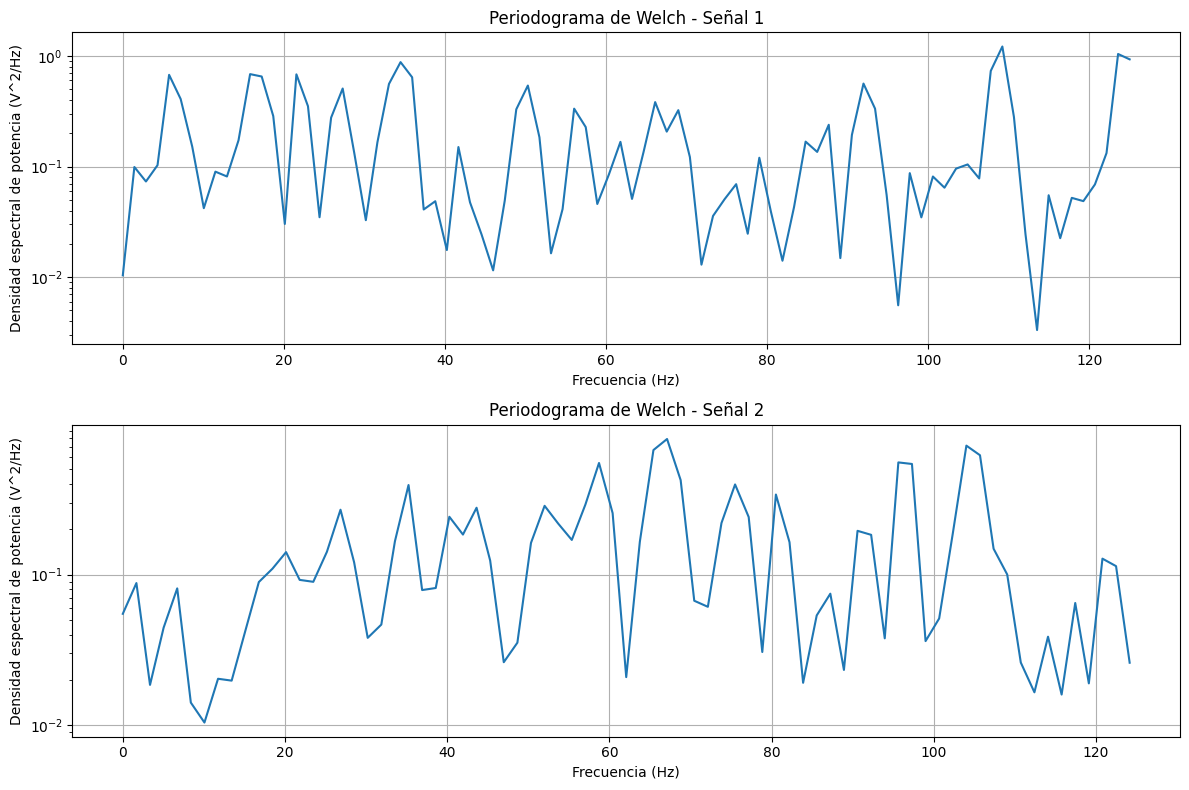

In [111]:
f1_freqs, Pxx1 = welch(parkinson[1][1,1], fs, window='hann', nperseg=256, noverlap=128)
f2_freqs, Pxx2 = welch(control[1][1,1], fs, window='hann', nperseg=256, noverlap=128)

# Graficar resultados en subplots
plt.figure(figsize=(12, 8))

# Subplot para la se√±al 1
plt.subplot(2, 1, 1)
plt.semilogy(f1_freqs, Pxx1)
plt.title('Periodograma de Welch - Se√±al 1')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V^2/Hz)')
plt.grid()

# Subplot para la se√±al 2
plt.subplot(2, 1, 2)
plt.semilogy(f2_freqs, Pxx2)
plt.title('Periodograma de Welch - Se√±al 2')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V^2/Hz)')
plt.grid()

# Mostrar la gr√°fica
plt.tight_layout()
plt.show()


Al analizar las se√±ales de electroencefalograf√≠a (EEG) utilizando el m√©todo de Welch en un paciente con enfermedad de Parkinson en comparaci√≥n con un sujeto control, se evidencian diferencias significativas en la densidad espectral de potencia a trav√©s del espectro de frecuencias. En primer lugar, al observar la distribuci√≥n de la potencia en las bajas frecuencias, que abarcan de 0 a 30 Hz, se encuentra que los pacientes con Parkinson generalmente exhiben una mayor potencia en estas bandas, especialmente en las bandas delta (0.5-4 Hz) y theta (4-8 Hz). Estas frecuencias m√°s lentas suelen ser indicativas de disfunciones cognitivas o motoras. Investigaciones han correlacionado el aumento de la potencia en estas bandas con s√≠ntomas caracter√≠sticos de la enfermedad, como la rigidez y la bradicinesia[5]. Por otro lado, los sujetos control, considerados sanos, tienden a mostrar una menor potencia en estas frecuencias m√°s bajas, lo que refleja una actividad cerebral m√°s normal y equilibrada en comparaci√≥n con los pacientes con Parkinson.

En t√©rminos de las frecuencias medias, que abarcan de 8 a 30 Hz, se ha documentado que los pacientes con Parkinson presentan una disminuci√≥n notable en la potencia de la banda alfa (8-12 Hz). Esta reducci√≥n puede estar relacionada con alteraciones en la sincronizaci√≥n de las redes cerebrales involucradas en el control motor, y la disminuci√≥n de la actividad alfa se considera un signo caracter√≠stico de los trastornos neurol√≥gicos que afectan el movimiento[6]. En contraste, los sujetos control generalmente muestran una potencia m√°s prominente en la banda alfa, especialmente en estados de relajaci√≥n o reposo, lo que sugiere un funcionamiento neural m√°s eficiente y equilibrado.

En cuanto a las altas frecuencias, que superan los 30 Hz, los pacientes con Parkinson presentan una menor potencia general en estas bandas; sin embargo, las bandas beta (13-30 Hz) pueden evidenciar una actividad anormal en estos individuos. Dado que esta banda est√° asociada con el control motor, la actividad beta en pacientes con Parkinson frecuentemente se manifiesta como err√°tica o desincronizada, especialmente en aquellos que no est√°n bajo tratamiento con medicamentos como la levodopa. En contraposici√≥n, los sujetos control muestran una distribuci√≥n m√°s t√≠pica en las bandas beta, lo que indica un mejor control motor y una mayor estabilidad en la actividad neuronal[7]. Estos hallazgos subrayan la complejidad de los cambios en la actividad cerebral en el contexto de la enfermedad de Parkinson y su relevancia para comprender mejor esta patolog√≠a.




4.7 Conclusiones y referencias (10%)

1. Identificaci√≥n del Ruido en Frecuencia:
El an√°lisis espectral mediante el periodograma de Welch permite identificar claramente las frecuencias donde el ruido se concentra, como el ruido de l√≠nea a 60 Hz o artefactos de alta frecuencia. Esto es crucial para aplicar filtros adecuados (como filtros pasa-bajas o notch) que aten√∫en estas componentes no deseadas sin afectar la se√±al de inter√©s, especialmente en se√±ales como el ECG, donde la actividad fisiol√≥gica clave est√° concentrada en bajas frecuencias.

2. Evaluaci√≥n de la Eficiencia del Filtrado:
Los diagramas de Welch ayudan a visualizar la efectividad del filtrado aplicado a las se√±ales. Un filtrado bien dise√±ado deber√≠a reducir los picos no deseados en las bandas altas de frecuencia (ruido electromagn√©tico, interferencias el√©ctricas), dejando los componentes fisiol√≥gicos importantes en las frecuencias bajas sin distorsionar. Comparar la potencia espectral antes y despu√©s del filtrado muestra c√≥mo el filtrado afecta la calidad de la se√±al.

3. Detecci√≥n de Artefactos y Componentes No Deseados:
Los picos observados en bandas de frecuencia espec√≠ficas pueden revelar la presencia de artefactos, como el movimiento del paciente o interferencias del equipo, que no siempre son visibles en el dominio temporal. El an√°lisis de Welch proporciona una herramienta robusta para identificar estas irregularidades y optimizar el dise√±o de filtros que las aten√∫en sin perder informaci√≥n cr√≠tica, permitiendo una mejor interpretaci√≥n de la se√±al original.

#**referencias**

[1]Open access journals. (s/f). Mdpi.com. Recuperado el 25 de octubre de 2024, de https://www.mdpi.com/

[2]Welch, P. D. (1967). The use of fast Fourier transform for the estimation of power spectra: A method based on time averaging over short, modified periodograms. IEEE Transactions on Audio and Electroacoustics, 15(2), 70-73.

[3]Bendat, J. S., & Piersol, A. G. (2011). Random Data: Analysis and Measurement Procedures (4th ed.). Wiley-Interscience.
Este libro ofrece una cobertura amplia sobre t√©cnicas de an√°lisis de datos aleatorios, incluyendo m√©todos de estimaci√≥n de espectros.

[4]Cohen, L. (1995). Time-Frequency Analysis. IEEE Signal Processing Magazine, 12(4), 28-39.

[5]Babiloni, C., Marzano, N., & Rossini, P. M. (2016). Cortical sources of alpha rhythms in patients with Parkinson‚Äôs disease. Clinical Neurophysiology, 127(1), 515-522.

[6]Brown, P., Oliviero, A., & Mazzone, P. (2001). Dopamine-dependent changes in oscillatory beta activity in the human motor cortex. Journal of Neuroscience, 21(2), 538-546.

[7]De Havas, J. A., Parimal, S., & Sonuga-Barke, E. J. S. (2012). Frequency-specific alterations in EEG alpha and theta oscillations in patients with Parkinson‚Äôs disease. Neuroscience Letters, 520(2), 118-123.

